In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# reading the lung.tsv data
lung_data = pd.read_csv('lung.tsv', sep='\t')
lung_data.head()

,peptide,patient,class,area
0,PEP100112,PAT856,tumor,12856454.0
1,PEP22404,PAT856,tumor,6414458.0
2,PEP99626,PAT856,tumor,3609832.0
3,PEP45597,PAT856,tumor,2308757.0
4,PEP21193,PAT856,tumor,4055206.0


In [5]:
#checking data types
lung_data.dtypes

peptide     object
patient     object
class       object
area       float64
dtype: object

Since for each patient we have a healthy and tumor tissue sample lets pivot the dataset to have patients in rows

In [6]:
# Pivoting the data to have patients as rows and peptides as columns
lung_pivot_data = lung_data.pivot_table(index=['patient', 'class'], columns='peptide', values='area').reset_index()
lung_pivot_data.head()


peptide,patient,class,PEP100112,PEP100117,PEP100122,PEP100185,PEP100196,PEP100199,PEP100200,PEP100235,...,PEP984381,PEP98510,PEP98613,PEP98962,PEP99225,PEP993975,PEP99614,PEP99626,PEP99692,PEP99941
0,PAT1002,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75918023.0,NaN,NaN,NaN,2156828.0,NaN,NaN,NaN
1,PAT1002,tumor,7659641.0,NaN,NaN,NaN,NaN,NaN,6002016.0,2303740.0,...,3665790.0,5238347.0,9089422.0,NaN,NaN,878450.0,7178121.0,4611887.0,NaN,4570840.0
2,PAT1004,healthy,6364238.0,NaN,1818238.0,1286148.0,5384528.0,8378111.0,1518295.0,15019691.0,...,4690539.0,20948073.0,32488902.0,3479581.0,NaN,2192840.0,7063643.0,7721440.0,NaN,4044972.0
3,PAT1004,tumor,19746662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3102477.0,NaN,NaN
4,PAT1039,healthy,2530218.0,NaN,NaN,1570634.0,24690275.0,5220358.0,NaN,2657158.0,...,5244558.0,15881597.0,12713140.0,NaN,NaN,NaN,1657152.0,6684031.0,NaN,461381.0


In [7]:
# lets separate healthy and tumor tissue samples
tumor_data = lung_pivot_data[lung_pivot_data['class'] == 'tumor'].drop(columns='class')
healthy_data = lung_pivot_data[lung_pivot_data['class'] == 'healthy'].drop(columns='class')
print(tumor_data.head())
print(healthy_data.head())

peptide  patient   PEP100112    PEP100117  PEP100122  PEP100185  PEP100196  \
1        PAT1002   7659641.0          NaN        NaN        NaN        NaN   
3        PAT1004  19746662.0          NaN        NaN        NaN        NaN   
5        PAT1039   2612619.0          NaN        NaN        NaN  6969862.0   
7        PAT1061   6666251.0   39095741.0        NaN  2832495.0  3213538.0   
9        PAT1064  11599177.0  133198160.0  2510549.0  1711063.0        NaN   

peptide  PEP100199  PEP100200  PEP100235  PEP100276  ...  PEP984381  \
1              NaN  6002016.0  2303740.0   478916.0  ...  3665790.0   
3              NaN        NaN        NaN        NaN  ...        NaN   
5        2160825.0        NaN        NaN        NaN  ...  4546243.0   
7         689186.0        NaN  1021914.0  8398242.0  ...  2731185.0   
9        2270065.0  1276083.0  1814318.0  3487306.0  ...  2387756.0   

peptide   PEP98510    PEP98613   PEP98962    PEP99225  PEP993975   PEP99614  \
1        5238347.0   9089

In [9]:
# Merge tumor and healthy data on patient
merged_data = pd.merge(tumor_data, healthy_data, on='patient', suffixes=('_tumor', '_healthy'))
merged_data.head()

peptide,patient,PEP100112_tumor,PEP100117_tumor,PEP100122_tumor,PEP100185_tumor,PEP100196_tumor,PEP100199_tumor,PEP100200_tumor,PEP100235_tumor,PEP100276_tumor,...,PEP984381_healthy,PEP98510_healthy,PEP98613_healthy,PEP98962_healthy,PEP99225_healthy,PEP993975_healthy,PEP99614_healthy,PEP99626_healthy,PEP99692_healthy,PEP99941_healthy
0,PAT1002,7659641.0,NaN,NaN,NaN,NaN,NaN,6002016.0,2303740.0,478916.0,...,NaN,NaN,75918023.0,NaN,NaN,NaN,2156828.0,NaN,NaN,NaN
1,PAT1004,19746662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4690539.0,20948073.0,32488902.0,3479581.0,NaN,2192840.0,7063643.0,7721440.0,NaN,4044972.0
2,PAT1039,2612619.0,NaN,NaN,NaN,6969862.0,2160825.0,NaN,NaN,NaN,...,5244558.0,15881597.0,12713140.0,NaN,NaN,NaN,1657152.0,6684031.0,NaN,461381.0
3,PAT1061,6666251.0,39095741.0,NaN,2832495.0,3213538.0,689186.0,NaN,1021914.0,8398242.0,...,NaN,7745639.0,7477124.0,1391859.0,4486360.0,NaN,3238954.0,7411498.0,2410974.0,NaN
4,PAT1064,11599177.0,133198160.0,2510549.0,1711063.0,NaN,2270065.0,1276083.0,1814318.0,3487306.0,...,4966589.0,10226382.0,87230562.0,NaN,NaN,825193.0,5087786.0,8064994.0,445174.0,2002260.0


In [12]:
# lets calculate the differences in the peptide abundance between tumor and healthy samples
for peptide in lung_data['peptide'].unique():
    merged_data[f'diff_{peptide}'] = merged_data[f'{peptide}_tumor'] - merged_data[f'{peptide}_healthy']

In [14]:
# Identifing any present Outliers
# Calculating the mean and standard deviation of differences
diff_columns = [col for col in merged_data.columns if col.startswith('diff_')]
merged_data['mean_diff'] = merged_data[diff_columns].mean(axis=1)
merged_data['std_diff'] = merged_data[diff_columns].std(axis=1)
merged_data


peptide,patient,PEP100112_tumor,PEP100117_tumor,PEP100122_tumor,PEP100185_tumor,PEP100196_tumor,PEP100199_tumor,PEP100200_tumor,PEP100235_tumor,PEP100276_tumor,...,diff_PEP144066,diff_PEP62898,diff_PEP160307,diff_PEP365036,diff_PEP49381,diff_PEP63130,diff_PEP16407,diff_PEP94900,mean_diff,std_diff
0,PAT1002,7659641.0,NaN,NaN,NaN,NaN,NaN,6002016.0,2303740.0,478916.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1185764.0,NaN,-3.755192e+08,7.087595e+09
1,PAT1004,19746662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24035852.0,NaN,NaN,-3.331812e+07,1.775180e+08
2,PAT1039,2612619.0,NaN,NaN,NaN,6969862.0,2160825.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-297830.0,NaN,-1.248929e+07,1.589930e+08
3,PAT1061,6666251.0,39095741.0,NaN,2832495.0,3213538.0,689186.0,NaN,1021914.0,8398242.0,...,NaN,NaN,835157.0,NaN,NaN,NaN,NaN,NaN,-2.222402e+07,6.658313e+08
4,PAT1064,11599177.0,133198160.0,2510549.0,1711063.0,NaN,2270065.0,1276083.0,1814318.0,3487306.0,...,NaN,2606996.0,-221270.0,NaN,619912.0,-13933609.0,NaN,3123193.0,2.551450e+06,7.118775e+07
5,PAT1084,4145148.0,50678745.0,1574350.0,3362122.0,NaN,2585813.0,6056229.0,NaN,3762865.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.788965e+05,4.897482e+07
6,PAT1088,11004170.0,3861279.0,2582911.0,2786381.0,17999898.0,2086158.0,992099.0,4995087.0,6546270.0,...,NaN,NaN,NaN,-349420.0,NaN,NaN,-612.0,NaN,-2.214017e+06,6.511821e+07
7,PAT1091,5785577.0,61775763.0,773180.0,NaN,8362658.0,365563.0,3719406.0,8282069.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.051836e+06,7.964969e+07
8,PAT1119,14794824.0,NaN,1251859.0,1790205.0,4097440.0,6204288.0,1805807.0,NaN,2446004.0,...,NaN,NaN,2179537.0,4838046.0,-1319110.0,NaN,NaN,6152651.0,-2.344969e+06,1.319192e+08
9,PAT1124,6671832.0,NaN,2302127.0,NaN,28651569.0,2833092.0,1642220.0,3789644.0,NaN,...,NaN,NaN,652178.0,NaN,NaN,NaN,-385488.0,NaN,-8.139877e+06,2.498217e+08


In [15]:
# Identifing the sample with the highest mean difference
contaminated_sample = merged_data.loc[merged_data['mean_diff'].idxmax(), 'patient']
contaminated_sample

'PAT1156'

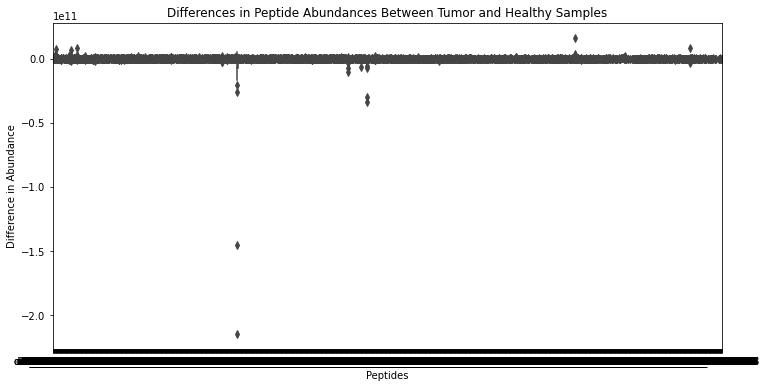

In [16]:
# Visualization
# Ploting the differences for each patient
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[diff_columns])
plt.title('Differences in Peptide Abundances Between Tumor and Healthy Samples')
plt.xlabel('Peptides')
plt.ylabel('Difference in Abundance')
plt.show()

the box plots are not really clear so lets take few patiens and plot for few peptide


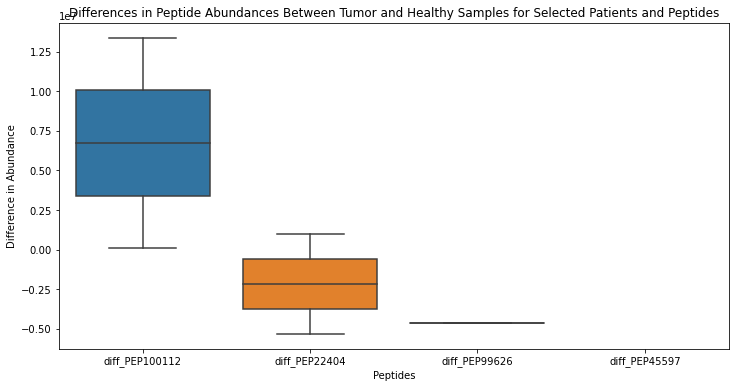

In [21]:
# Selecting any patient and 4 peptides for visualization
selected_patients = merged_data['patient'].unique()[:3]
selected_peptides = lung_data['peptide'].unique()[:4]

# Filtering  the merged_data for the selected patients
filtered_data = merged_data[merged_data['patient'].isin(selected_patients)]

# Creating a list of columns to plot
selected_diff_columns = [f'diff_{peptide}' for peptide in selected_peptides]

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data[selected_diff_columns])
plt.title('Differences in Peptide Abundances Between Tumor and Healthy Samples for Selected Patients and Peptides')
plt.xlabel('Peptides')
plt.ylabel('Difference in Abundance')
plt.show()

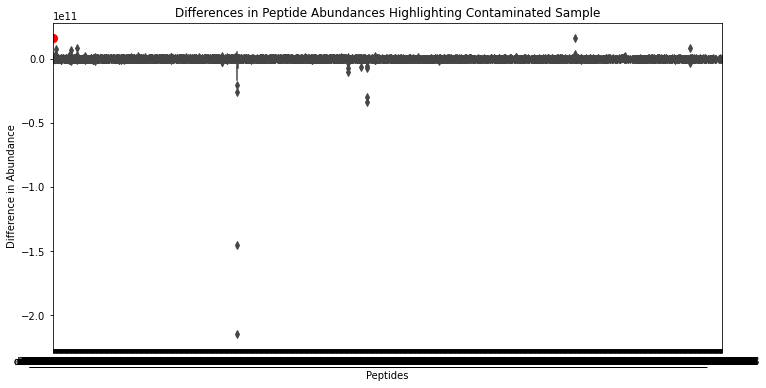

In [17]:
# Highlighting the contaminated sample
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[diff_columns])
sns.scatterplot(x=[contaminated_sample]*len(diff_columns), y=merged_data.loc[merged_data['patient'] == contaminated_sample, diff_columns].values.flatten(), color='red', s=100)
plt.title('Differences in Peptide Abundances Highlighting Contaminated Sample')
plt.xlabel('Peptides')
plt.ylabel('Difference in Abundance')
plt.show()

In [22]:
print(f"The contaminated healthy tissue sample is from patient ID: {contaminated_sample}")

The contaminated healthy tissue sample is from patient ID: PAT1156


The idea behind this conclusion is the largest mean difference between the healthy and the umorous tissue sample
